
최근 5년 간 마른 몸을 동경하는 어린 여성들의 식이 장애가 늘어나고 있다는 기사를 보았다.
국민건강보험공단에서 제공한 식이장애 관련 상병별 진료현황을 분석하여 나이와 성별에 따른 식이장애 현황을 확인하고자 한다. 
10대 후반, 20대 초반의 여성이 가장 식이 장애를 많이 가지고 있을 것으로 예상된다.


In [61]:

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('./eating_disorder.csv', encoding='cp949')
df.head()

,주상병코드,주상병명,진료년도,수진자 주소지,연령,성별,진료건수(건),진료비(천원)
0,F50,식사장애,2018년,서울특별시,0,남자,3,56
1,F50,식사장애,2018년,서울특별시,0,여자,8,144
2,F50,식사장애,2018년,서울특별시,1,남자,14,366
3,F50,식사장애,2018년,서울특별시,1,여자,16,272
4,F50,식사장애,2018년,서울특별시,2,남자,11,487


In [63]:
#필요한 내용 영어, 숫자로 변경
df.columns= ['code' ,'disease', 'year','add','age','gender','number','expenses']
df= df.replace({'식사장애':'eating_disorder','남자':'0','여자':'1'})

df.head()


,code,disease,year,add,age,gender,number,expenses
0,F50,eating_disorder,2018년,서울특별시,0,0,3,56
1,F50,eating_disorder,2018년,서울특별시,0,1,8,144
2,F50,eating_disorder,2018년,서울특별시,1,0,14,366
3,F50,eating_disorder,2018년,서울특별시,1,1,16,272
4,F50,eating_disorder,2018년,서울특별시,2,0,11,487


In [64]:
#데이터 프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21999 entries, 0 to 21998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      21999 non-null  object
 1   disease   21999 non-null  object
 2   year      21999 non-null  object
 3   add       21999 non-null  object
 4   age       21999 non-null  int64 
 5   gender    21999 non-null  object
 6   number    21999 non-null  int64 
 7   expenses  21999 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [65]:
#필요한 데이터만 추출
df = df[(df['disease'] == 'eating_disorder')| (df['add']=='서울특별시')]
df = df[(df['age'] < 61)]
df = df[(df['year'] == '2019년')|(df['year'] == '2020년')|(df['year'] == '2021년')|(df['year'] == '2022년')]

최근 5년 간 기록을 보기위해 년도를 구분하고, 노화로 인한 식이장애가 생기는 것을 배제하기 위해 나이를 60세까지로 한정함.
자료의 양이 방대해 서울특별시만으로 지역을 제한함.

In [66]:
#데이터 프레임 확인
df.tail()

,code,disease,year,add,age,gender,number,expenses
21949,Z72.4,부적당한 식사 및 식사습관,2022년,서울특별시,46,0,1,17
21950,Z72.4,부적당한 식사 및 식사습관,2022년,서울특별시,46,1,1,19
21951,Z72.4,부적당한 식사 및 식사습관,2022년,서울특별시,48,1,1,22
21952,Z72.4,부적당한 식사 및 식사습관,2022년,서울특별시,51,1,1,17
21953,Z72.4,부적당한 식사 및 식사습관,2022년,서울특별시,54,1,1,12


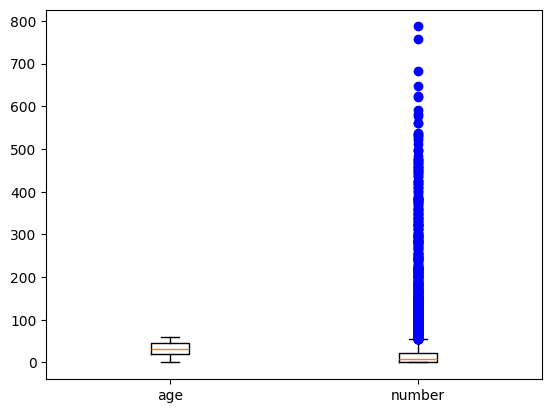

In [67]:
#데이터 값이 한쪽으로 치우쳤는 지 확인 위해 박스플롯 그래프 확인
fig, ax = plt.subplots()
ax.boxplot([df['age'],df['number']], sym='bo')

plt.xticks([1,2],['age','number'])
plt.show()

number의 데이터가 치우쳐져 있어 조정 필요함.

In [68]:
#로그 함수를 적용하여 값의 분포를 조정
import numpy as np

df['number_log']= np.log1p(df['number'])

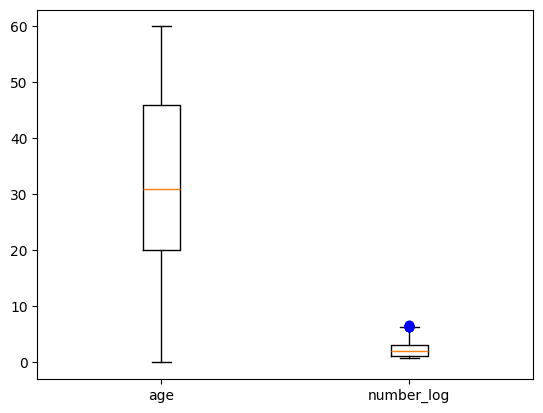

In [69]:
# 박스플롯 그래프 재확인
fig, ax = plt.subplots()
ax.boxplot([df['age'],df['number_log']], sym='bo')

plt.xticks([1,2],['age','number_log'])
plt.show()

<Axes: xlabel='number_log'>

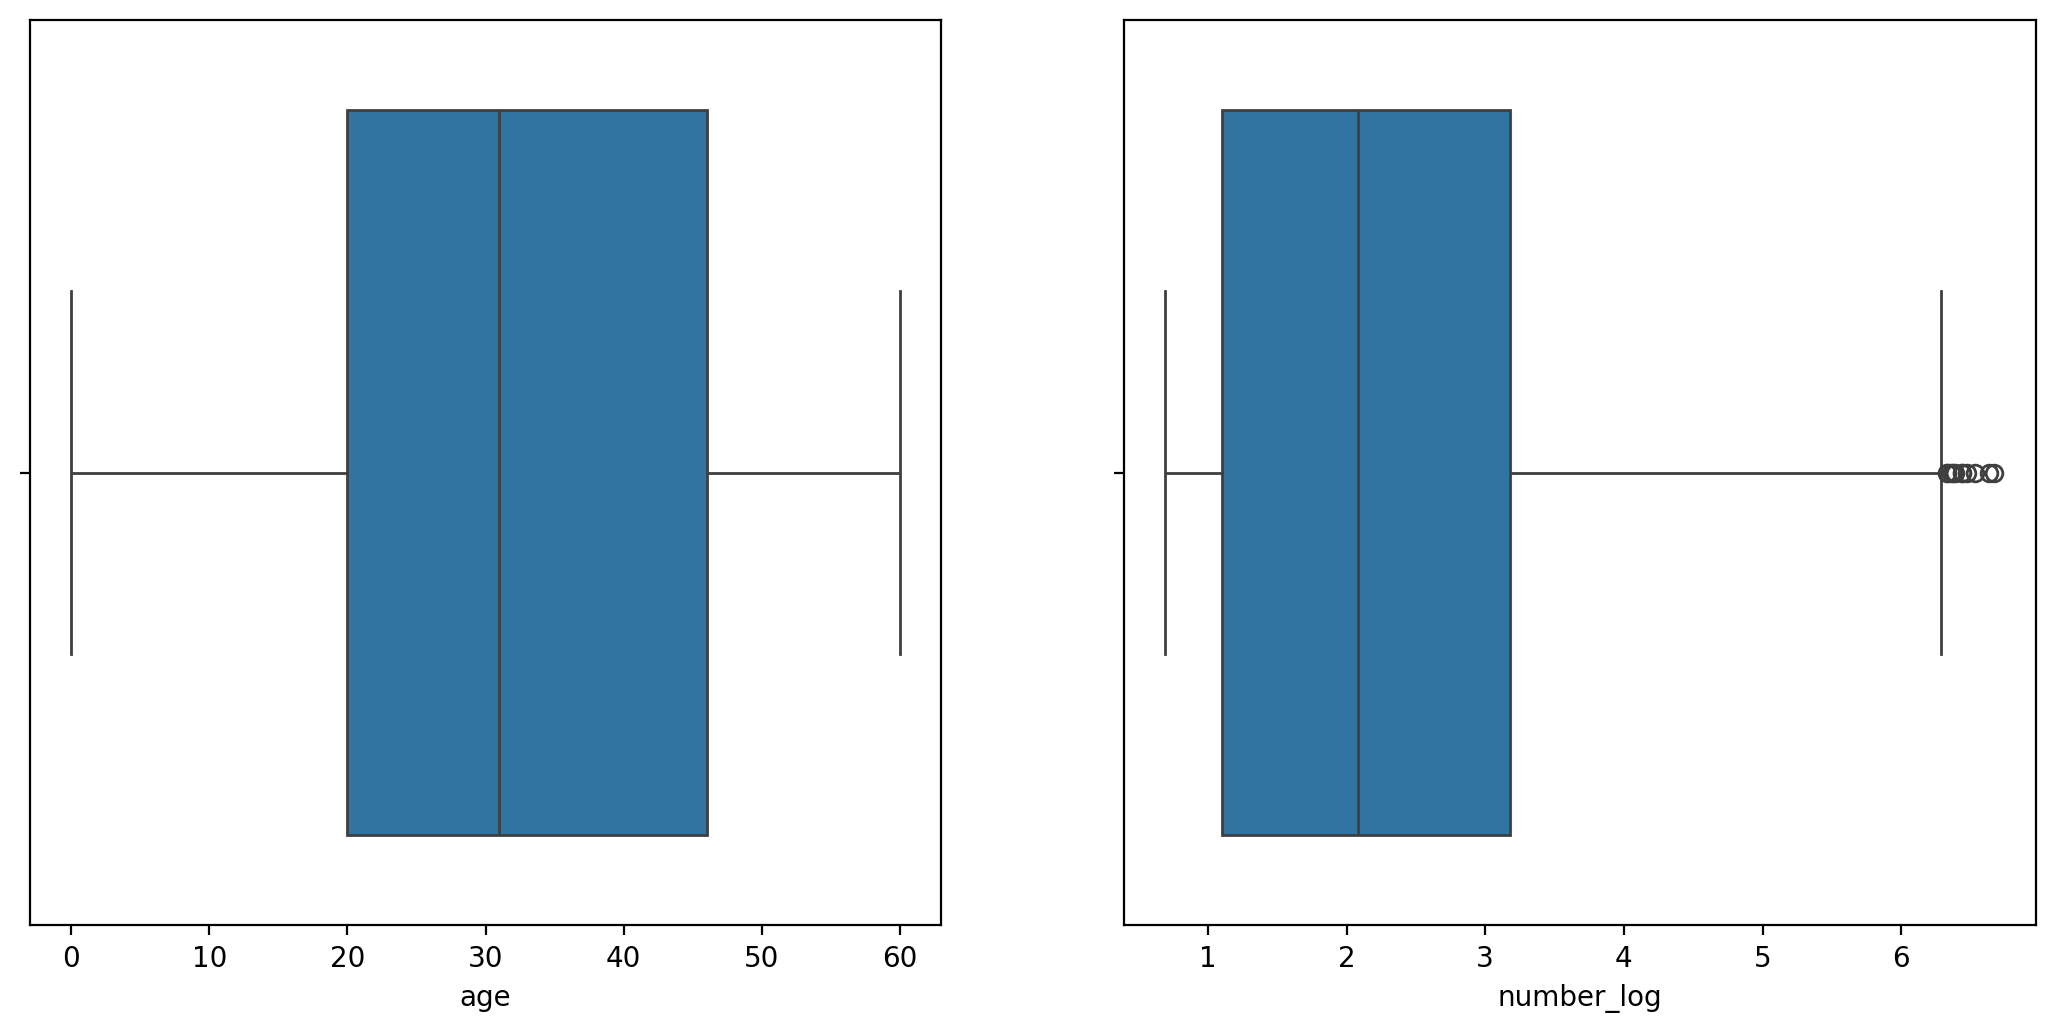

In [70]:
#결과 확인 
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x = 'age', data = df)

plt.subplot(3,3,2)
sns.boxplot(x = 'number_log', data = df)


로그 변환 후 고르게 분포되어있음을 확인함.

In [71]:
#범주형 데이터를 숫자형으로 변환 후 age와 gender로 number_log 예측 준비 과정
from sklearn.preprocessing import LabelEncoder, StandardScaler


le = LabelEncoder()



X = df.loc[:, ('number_log', 'age','gender')]

y = df['number_log']

X['number_log'] = le.fit_transform(X['number_log'])


y = le.transform(y)

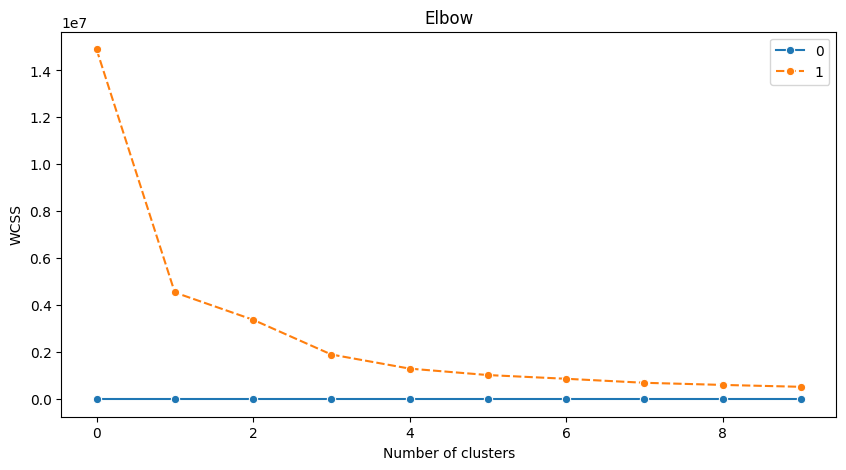

In [72]:
#클러스터 개수에 대한 WCSS 값 저장 과정

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#엘보우 결과 시각화
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

클러스터 개수가 2가 될때 그래프가 천천히 감소하는 것을 보아 적절한 개수는 2.

* 클러스터 중심점 분석

In [73]:
# 클러스터의 중심점 확인
cluster_centers = kmeans.cluster_centers_

# 각 클러스터의 중심점 출력
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}의 중심점: {center}")

Cluster 1의 중심점: [ 3.38934803 11.14141414  0.51882461]
Cluster 2의 중심점: [212.67  24.99   1.  ]
Cluster 3의 중심점: [ 4.76412214 31.98854962  0.5259542 ]
Cluster 4의 중심점: [94.81927711 32.12650602  0.98192771]
Cluster 5의 중심점: [25.27643505 22.38821752  0.80966767]
Cluster 6의 중심점: [280.17073171  25.79268293   1.        ]
Cluster 7의 중심점: [ 3.41678129 51.75997249  0.62654746]
Cluster 8의 중심점: [149.53061224  29.78571429   1.        ]
Cluster 9의 중심점: [54.56739812 27.10344828  0.92163009]
Cluster 10의 중심점: [28.35632184 46.0862069   0.87068966]


진료 건 수, 나이, 성별 순으로 

Cluster가 1일때: 20대 중반의 사람들이 약 14.7번의 진료 건 수를 가지고 있다.

Cluster가 2일때: Cluster1 과는 다르게 성별이 확연히 드러난다.
                 20대 중반의 여성들이 약 198.6번의 많은 진료 건 수를 가지고 있다. 

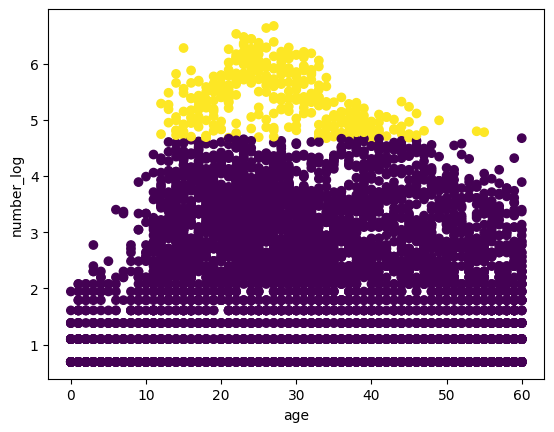

In [74]:
#나이대별 진료 건 수 선점도 시각화

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['age'],df['number_log'],c = labels)
plt.xlabel('age')
plt.ylabel('number_log')
plt.show()

산점도를 보면 10대 초반 부터 진료 건 수가 많아지기 시작하고 계속 높은 수를 유지하다 30대 초반 쯤 내려가는 것을 알 수 있다. 
10대 중반과 20대 중반 사이의 나이의 진료 건 수가 많은 것을 알 수 있다.

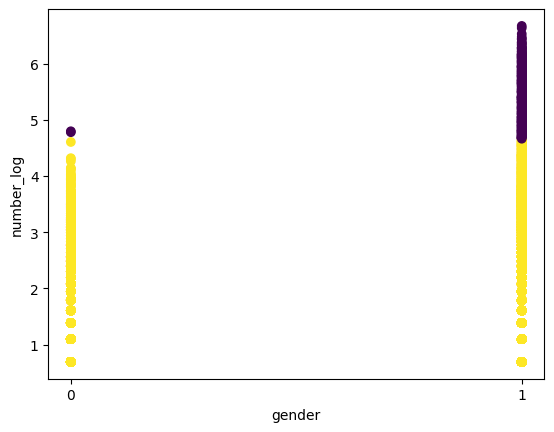

In [75]:
#성별별 진료 건 수 선점도 시각화

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['gender'],df['number_log'],c = labels)
plt.xlabel('gender')
plt.ylabel('number_log')
plt.show()

성별은 0과 1 밖에 없으므로 모두 0과 1에 분포 되어있고 여성인 1에 확연히 몰려있음을 알 수 있다.

클러스터 시각화 결과 10대 중반 ~ 20대 중반의 여성이 식이장애를 가지고 있는 것을 알 수 있다.

* 실루엣 점수를 활용한 클러스터링의 효과

In [76]:
#실루엣 점수 도출

from sklearn import metrics
score = metrics.silhouette_score(X, labels)
score

0.8131594925523662

-1 ~ 1 의 값 중 1에 가까운 값이 클러스트링이 잘 된 값인데 해당 실루엣 점수는 약 0.51으로 높은 편이며 클러스터링이 잘 된 것을 나타낸다. 

실루엣 점수는 적절한 클러스터 개수를 정하는 기준으로 삼을 수 있다. 높은 실루엣 점수는 데이터가 잘 구분되어 있고 각 클러스터가 응집되어 있다는 것을 나타내며, 낮은 실루엣 점수는 클러스터링이 잘못되었을 가능성이 있다는 것을 나타낸다.